# Visualization Notebook
This file can be used to plot your graph and to try out your solve function. It is not part of the grading.

First we import necessary packages and then define our plotting function

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
import json
from networkx.readwrite import json_graph
from agv import solve


def plot_graph(G: nx.Graph, plot_weights: bool, pos_given: bool):
    """Plots the graph

    Args:
        G (nx.DiGraph): Graph to plot
        plot_weights (bool): Set to true if you want to plot the weights of the edges/arcs
        pos_given (bool): Set to true if the graph has a pos attribute
    """
    if pos_given:
        pos=nx.get_node_attributes(G,'pos')
    else:
        pos = nx.shell_layout(G)
    node_labels = {n: n for n in G.nodes}
    if plot_weights:
        edge_labels = dict(
            [((u, v), f'{G.edges[(u, v)]["weight"]}') for u, v in G.edges])
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw(G, with_labels=True, labels=node_labels, pos=pos)
    plt.show()


Lets start by plotting the original street layout

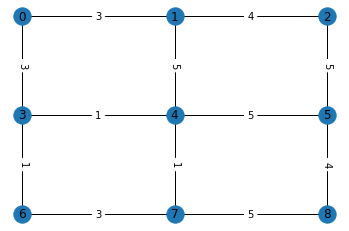

<class 'networkx.classes.graph.Graph'>
{'graph_attr_dict_factory': <class 'dict'>, 'node_dict_factory': <class 'dict'>, 'node_attr_dict_factory': <class 'dict'>, 'adjlist_outer_dict_factory': <class 'dict'>, 'adjlist_inner_dict_factory': <class 'dict'>, 'edge_attr_dict_factory': <class 'dict'>, 'graph': {}, '_node': {0: {'pos': [0, 2]}, 1: {'pos': [1, 2]}, 2: {'pos': [2, 2]}, 3: {'pos': [0, 1]}, 4: {'pos': [1, 1]}, 5: {'pos': [2, 1]}, 6: {'pos': [0, 0]}, 7: {'pos': [1, 0]}, 8: {'pos': [2, 0]}}, '_adj': {0: {1: {'weight': 3}, 3: {'weight': 3}}, 1: {0: {'weight': 3}, 2: {'weight': 4}, 4: {'weight': 5}}, 2: {1: {'weight': 4}, 5: {'weight': 5}}, 3: {0: {'weight': 3}, 4: {'weight': 1}, 6: {'weight': 1}}, 4: {1: {'weight': 5}, 3: {'weight': 1}, 5: {'weight': 5}, 7: {'weight': 1}}, 5: {2: {'weight': 5}, 4: {'weight': 5}, 8: {'weight': 4}}, 6: {3: {'weight': 1}, 7: {'weight': 3}}, 7: {4: {'weight': 1}, 6: {'weight': 3}, 8: {'weight': 5}}, 8: {5: {'weight': 4}, 7: {'weight': 5}}}, 'nodes': Node

In [13]:
# Instance to solve
full_instance_path = 'data_2.json'

with open(full_instance_path) as f:
    data = json.load(f)
    g_street = json_graph.node_link_graph(data['graph'])

plot_graph(g_street, True, True)

# get type of graph
print(type(g_street))
# show attributes of graph， class 'networkx.classes.graph.Graph'
print(g_street.__dict__)


weight:  (0, 1) 1
weight:  (0, 2) 3
weight:  (2, 1) 1
K_max: 3
position  {'0_0': (0, 0), '2_0': (2, 0), '1_0': (1, 0), '0_1': (0, 1), '2_1': (2, 1), '1_1': (1, 1), '0_2': (0, 2), '2_2': (2, 2), '1_2': (1, 2)}
add source node (1, start) on (1, -1 )
add sink node (1, end) on (3, 3)
add source node (0, start) on (0, -1 )
add sink node (0, end) on (3, 3)
position  {'0_0': (0, 0), '2_0': (2, 0), '1_0': (1, 0), '0_1': (0, 1), '2_1': (2, 1), '1_1': (1, 1), '0_2': (0, 2), '2_2': (2, 2), '1_2': (1, 2), '(1, start)': ('1', -1), '(1, end)': (4, 2), '(0, start)': ('0', -1), '(0, end)': (3, 3)}
add arc from 0_0 to 1_1 with wight 1
add arc from 2_0 to 1_1 with wight 1
add arc from 0_1 to 1_2 with wight 1
add arc from 2_1 to 1_2 with wight 1
add arc from (1, start) to 2_1 with wight 0
add arc from 1_2 to (1, end) with wight 0
add arc from (0, start) to 0_0 with wight 0
add arc from 2_3 to (0, end) with wight 0
arcs  {('0_0', '1_1'): 1, ('0_0', '0_1'): 1, ('2_0', '1_1'): 1, ('2_0', '2_1'): 1, ('2_0', 

ValueError: Input values must have shape (N x 2) or (2).

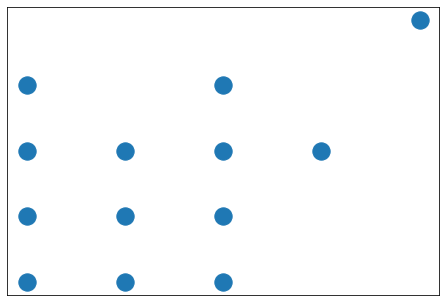

In [8]:
from agv import *

# Instance to solve
full_instance_path = 'data_4.json'
jobs, g_street= read_instance(full_instance_path)

# print weight of every edge from g_street
for edge in g_street.edges():
    print('weight: ', edge, g_street.edges[edge]['weight'])

# New directed graph
g_time_expanded = nx.DiGraph()

# get max j_d for all jobs
max_j_d = max([job['j_d'] for job in jobs.values()])
print("K_max:", max_j_d)
node_num = len(g_street.nodes())


# Adding nodes 
# add all nodes from g_street for every time step in the time-expanded graph, g_time_expanded
for t in range(max_j_d):
    for node in g_street.nodes():
        g_time_expanded.add_node(f"{node}_{t}", pos=(node, t))
print('position ', nx.get_node_attributes(g_time_expanded, 'pos'))


# Adding source and sink nodes
# add source node for every time step in the time-expanded graph, g_time_expanded
for id, job in jobs.items():
    # add source node
    print(f"add source node ({id}, start) on ({id}, -1 )")
    g_time_expanded.add_node(f"({id}, start)", pos=(id, -1))

    # add sink node
    print(f"add sink node ({id}, end) on ({node_num}, {job['j_d'] + int(id)})")
    g_time_expanded.add_node(f"({id}, end)", pos=(node_num + int(id), job['j_d']))
print('position ', nx.get_node_attributes(g_time_expanded, 'pos'))


# Adding arcs
# add all arcs from g_street for every time step in the time-expanded graph, g_time_expanded
for t in range(max_j_d):
    for arc in g_street.edges():
        # check if arc is not out of bounds, then add links
        if t + g_street.edges[arc]['weight'] <= max_j_d - 1:
            print(f"add arc from {arc[0]}_{t} to {arc[1]}_{t + g_street.edges[arc]['weight']} with wight {g_street.edges[arc]['weight']}")
            g_time_expanded.add_edge(f"{arc[0]}_{t}", f"{arc[1]}_{t + g_street.edges[arc]['weight']}", weight=g_street.edges[arc]['weight'])

# add waiting arcs
for t in range(max_j_d - 1):
    for node in g_street.nodes():
        g_time_expanded.add_edge(f"{node}_{t}", f"{node}_{t + 1}", weight = 1)


g_time_expanded.add_edge("1_2", "(1, start)", weight = 1)
# add arcs from source node to first node of job and from last node of job to sink node
for id, job in jobs.items():
    # add arc from source node to first node of job
    print(f"add arc from ({id}, start) to {job['j_s']}_{job['j_r']} with wight 0")
    g_time_expanded.add_edge(f"({id}, start)", f"{job['j_s']}_{job['j_r']}", weight = 0)

    # add arc from last node of job to sink node
    print(f"add arc from {job['j_t']}_{job['j_d']} to ({id}, end) with wight 0")
    for t in range(job['j_r'], job['j_d']):
        g_time_expanded.add_edge(f"{job['j_t']}_{t}", f"({id}, end)", weight = 0)
print('arcs ', nx.get_edge_attributes(g_time_expanded, 'weight'))


# data is right but can't draw graph
plot_graph(G=g_time_expanded, plot_weights=False, pos_given=True)

Now we solve the instance and retrieve the time-expanded graph

In [14]:
from agv import *

full_instance_path = 'data_4.json'
model, g_time_expanded = solve(full_instance_path)

1 {'j_s': 2, 'j_t': 1, 'j_r': 1, 'j_d': 2}
add source node (1, start) on (1, 0)
add sink node (1, end) on (3, 3)
0 {'j_s': 0, 'j_t': 2, 'j_r': 0, 'j_d': 3}
add source node (0, start) on (0, 0)
add sink node (0, end) on (3, 3)
{'0_0': (0, 0), '2_0': (2, 0), '1_0': (1, 0), '0_1': (0, 1), '2_1': (2, 1), '1_1': (1, 1), '0_2': (0, 2), '2_2': (2, 2), '1_2': (1, 2), '(1, start)': ('1', -1), '(1, end)': (4, 2), '(0, start)': ('0', -1), '(0, end)': (3, 3)}
add arc from 0_0 to 1_1 with wight 1
add arc from 2_0 to 1_1 with wight 1
add arc from 0_1 to 1_2 with wight 1
add arc from 2_1 to 1_2 with wight 1
add arc from (1, start) to 2_1 with wight 0
add arc from 1_2 to (1, end) with wight 0
add arc from (0, start) to 0_0 with wight 0
add arc from 2_3 to (0, end) with wight 0
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 17 rows, 16 columns and 38 nonzeros
Model fingerprint: 0x153e6793
Variable 

Let's plot your time expanded graph - set the first flag to true if you added weights to your arcs and the second flag to true if you added positions to your nodes (recommended!). For example, you may use the time steps as y coordinates and the location IDs as x coordinates.

**NOTE:** This is just an example for your convenience, you do not need to add positions to your nodes or plot your graph for your submission.

ValueError: Input values must have shape (N x 2) or (2).

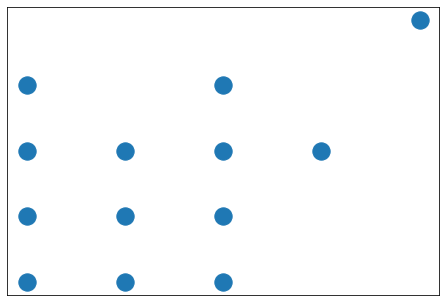

In [10]:
plot_graph(G=g_time_expanded, plot_weights=False, pos_given=True)


In [8]:
import gurobipy as gp

arcs, capacity = gp.multidict({
    ('Detroit', 'Boston'):   100,
    ('Detroit', 'New York'):  80,
    ('Detroit', 'Seattle'):  120,
    ('Denver',  'Boston'):   120,
    ('Denver',  'New York'): 120,
    ('Denver',  'Seattle'):  120})

print(arcs)

print(capacity)

print(arcs[0])
print(capacity[('Detroit', 'Boston')])

<gurobi.tuplelist (6 tuples, 2 values each):
 ( Detroit , Boston   )
 ( Detroit , New York )
 ( Detroit , Seattle  )
 ( Denver  , Boston   )
 ( Denver  , New York )
 ( Denver  , Seattle  )
>
{('Detroit', 'Boston'): 100, ('Detroit', 'New York'): 80, ('Detroit', 'Seattle'): 120, ('Denver', 'Boston'): 120, ('Denver', 'New York'): 120, ('Denver', 'Seattle'): 120}
('Detroit', 'Boston')
100
